In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil
import stat
import pathlib
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Load the data
df = pd.read_csv('HAM10000_metadata.csv')

In [ ]:
# Preview the data
print(df.head())

In [ ]:
# Check for missing values
print(df.isnull().sum())

In [ ]:
# Check the data types of each column
print(df.dtypes)

In [ ]:
# Summary statistics
print(df.describe())

In [ ]:
# Histogram of age
sns.histplot(data=df, x="age", bins=20)
plt.show()

In [ ]:
# Bar chart of diagnosis distribution
sns.countplot(data=df, x="dx")
plt.show()

In [ ]:
# Box plot of age by diagnosis
sns.boxplot(data=df, x="dx", y="age")
plt.show()

     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

        dataset  
0  vidir_modern  
1  vidir_modern  
2  vidir_modern  
3  vidir_modern  
4  vidir_modern  
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dtype: int64
lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dataset          object
dtype: object
               age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%  

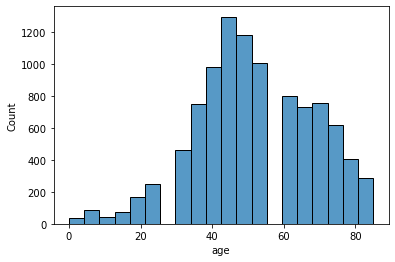

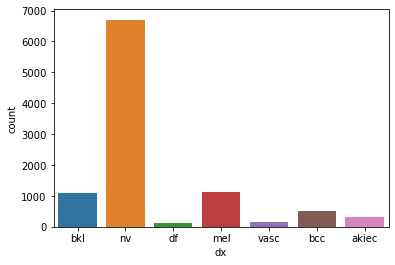

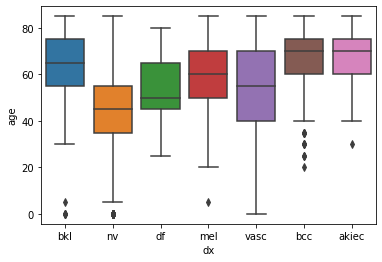

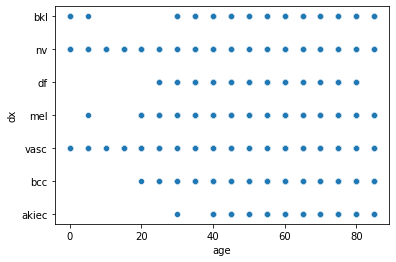

In [1]:
# Scatter plot of age vs. diagnosis
sns.scatterplot(data=df, x="age", y="dx")
plt.show()

In [2]:
df["age"].fillna(df["age"].median(), inplace=True)


In [3]:
df['sex'] = df['sex'].fillna(method='ffill')

In [4]:
df['localization'] = df['localization'].fillna(method='ffill')

In [5]:
df['dataset'] = df['dataset'].fillna(method='ffill')

In [6]:
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dtype: int64

In [7]:
df['lesion_id'] = df['lesion_id'].apply(lambda x : x + '.jpg')

In [8]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118.jpg,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118.jpg,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730.jpg,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730.jpg,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466.jpg,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867.jpg,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867.jpg,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867.jpg,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239.jpg,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [9]:
# Set the path to the directory containing the images
image_dir = 'C:/Users/laksh/HAM10000_images'



Number of images in the dataset: 10015


In [ ]:
# Count the number of files in the directory
num_images = len(os.listdir(image_dir))

# Print the number of images
print("Number of images in the dataset:", num_images)

In [ ]:
import os
from PIL import Image

In [10]:
# Loop over each file in the directory
for filename in os.listdir(image_dir):
    # Check if the file is an image
    if not filename.endswith('.jpg'):
        continue
    # Load the image
    img = Image.open(os.path.join(image_dir, filename))
    # Get the size of the image
    width, height = img.size
    # Print the filename, width, and height of the image
    print(f"Image file {filename} has shape {width} x {height}")

Image file ISIC_0024306.jpg has shape 600 x 450
Image file ISIC_0024307.jpg has shape 600 x 450
Image file ISIC_0024308.jpg has shape 600 x 450
Image file ISIC_0024309.jpg has shape 600 x 450
Image file ISIC_0024310.jpg has shape 600 x 450
Image file ISIC_0024311.jpg has shape 600 x 450
Image file ISIC_0024312.jpg has shape 600 x 450
Image file ISIC_0024313.jpg has shape 600 x 450
Image file ISIC_0024314.jpg has shape 600 x 450
Image file ISIC_0024315.jpg has shape 600 x 450
Image file ISIC_0024316.jpg has shape 600 x 450
Image file ISIC_0024317.jpg has shape 600 x 450
Image file ISIC_0024318.jpg has shape 600 x 450
Image file ISIC_0024319.jpg has shape 600 x 450
Image file ISIC_0024320.jpg has shape 600 x 450
Image file ISIC_0024321.jpg has shape 600 x 450
Image file ISIC_0024322.jpg has shape 600 x 450
Image file ISIC_0024323.jpg has shape 600 x 450
Image file ISIC_0024324.jpg has shape 600 x 450
Image file ISIC_0024325.jpg has shape 600 x 450
Image file ISIC_0024326.jpg has shape 60

In [16]:
# Check the size and shape of the dataset
print("Number of images:", len(df))
print("Number of classes:", len(df["dx"].unique()))

Number of images: 10015
Number of classes: 7


In [19]:
df['path'] = df['image_id'].apply(lambda x: f"{image_dir}/{x}.jpg")


In [20]:
df.shape

(10015, 9)

In [21]:
# Define the classes to be used for the classification task
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [23]:
# Filter the metadata to only include the selected classes
df = df[df['dx'].isin(classes)]

In [24]:
# Create a dictionary that maps each class to a numerical label
label_map = {
    'akiec': 0,
    'bcc': 1,
    'bkl': 2,
    'df': 3,
    'mel': 4,
    'nv': 5,
    'vasc': 6
}

In [26]:
# Create a new column in the metadata DataFrame with the numerical labels
df['label'] = df['dx'].map(label_map)

In [27]:
# Print column names for reference
print(df.columns)

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'dataset', 'path', 'label'],
      dtype='object')


In [28]:
# Split the data into training and testing sets
X_train, y_test =train_test_split(df, test_size=0.2, random_state=32, shuffle=True)


In [30]:
print("Number of images in training set:", len(X_train))
print("Number of images in validation set:", len(y_test))

Number of images in training set: 8012
Number of images in validation set: 2003


In [31]:
# Create an instance of the ImageDataGenerator class for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest')

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest')


# Set the batch size
batch_size = 16

In [ ]:
df['label'] = df['label'].astype(str)

In [38]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=df,
                                                    x_col="path",
                                                    y_col="label",
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    subset="training",
                                                    shuffle=True,
                                                    class_mode="categorical")

validation_generator = train_datagen.flow_from_dataframe(dataframe=df,
                                                         x_col="path",
                                                         y_col="label",
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         subset="validation",
                                                         shuffle=True,
                                                         class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=df,
                                                    x_col="path",
                                                    y_col="label",
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode="categorical")

Found 8012 validated image filenames belonging to 7 classes.
Found 2003 validated image filenames belonging to 7 classes.
Found 10015 validated image filenames belonging to 7 classes.


In [42]:
# Define the input shape of the images
IMG_SIZE = (224, 224)

# Define the number of classes
NUM_CLASSES = 7

# Define the batch size
BATCH_SIZE = 32

In [43]:
# Define the CNN-based model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [44]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)      0

In [46]:
# Define the early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


Epoch 1/20
251/251 [==============================] - 394s 2s/step - loss: 0.6780 - accuracy: 0.8298 - val_loss: 4.4425 - val_accuracy: 9.9850e-04
Epoch 2/20
251/251 [==============================] - 393s 2s/step - loss: 0.5301 - accuracy: 0.8414 - val_loss: 6.1278 - val_accuracy: 9.9850e-04
Epoch 3/20
251/251 [==============================] - 397s 2s/step - loss: 0.4833 - accuracy: 0.8501 - val_loss: 6.1232 - val_accuracy: 9.9850e-04
Epoch 4/20
251/251 [==============================] - 429s 2s/step - loss: 0.4544 - accuracy: 0.8526 - val_loss: 5.9701 - val_accuracy: 9.9850e-04
Epoch 5/20
251/251 [==============================] - 430s 2s/step - loss: 0.4199 - accuracy: 0.8666 - val_loss: 7.2584 - val_accuracy: 9.9850e-04
Epoch 6/20
251/251 [==============================] - 437s 2s/step - loss: 0.3970 - accuracy: 0.8656 - val_loss: 8.0724 - val_accuracy: 0.0020
Epoch 7/20
251/251 [==============================] - 458s 2s/step - loss: 0.4031 - accuracy: 0.8662 - val_loss: 7.9031 - 

313/313 [==============================] - 188s 601ms/step


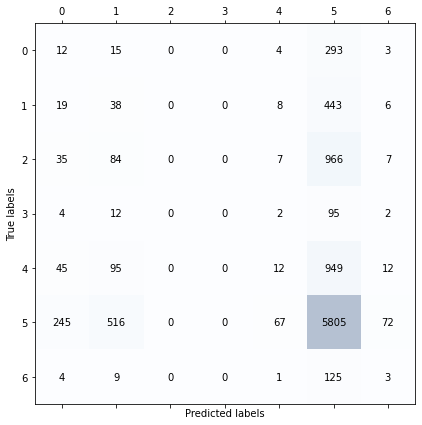

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the testing data
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [55]:
import numpy as np
from sklearn.metrics import classification_report

# Calculate the classification report
cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())

# Print the classification report
print('Classification Report:\n', cr)


Classification Report:
               precision    recall  f1-score   support

           0       0.04      0.04      0.04       327
           1       0.05      0.08      0.06       514
           2       0.00      0.00      0.00      1099
           3       0.00      0.00      0.00       115
           4       0.17      0.02      0.03      1113
           5       0.67      0.87      0.75      6705
           6       0.00      0.00      0.00       142

    accuracy                           0.59     10015
   macro avg       0.13      0.14      0.13     10015
weighted avg       0.47      0.59      0.51     10015



C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
